In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("telecom_churn_data.csv")

In [7]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [9]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [11]:
df.shape

(2000, 16)

In [13]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [7]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [15]:
if df['churn'].dtype != 'int64':
    df['churn'] = df['churn'].fillna(0).astype(int)

In [17]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                      0
dtype: int64

In [19]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [21]:
df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].mode()[0])

In [27]:
print(df.isnull().sum())
print("Missing values handled")

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64
Missing values handled


In [29]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [31]:
df.to_csv("cleaned_telecom_churn_data.csv", index=False)

In [33]:
print("Cleaned dataset saved as: cleaned_telecom_churn_data.csv")

Cleaned dataset saved as: cleaned_telecom_churn_data.csv


In [37]:
df = pd.read_csv('cleaned_telecom_churn_data.csv')

In [39]:
sns.set(style="whitegrid")

In [41]:
plt.rcParams['figure.figsize'] = (8,5)

C:\Users\anasm\AppData\Local\Temp\ipykernel_10880\151736155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn',data=df,palette='viridis')


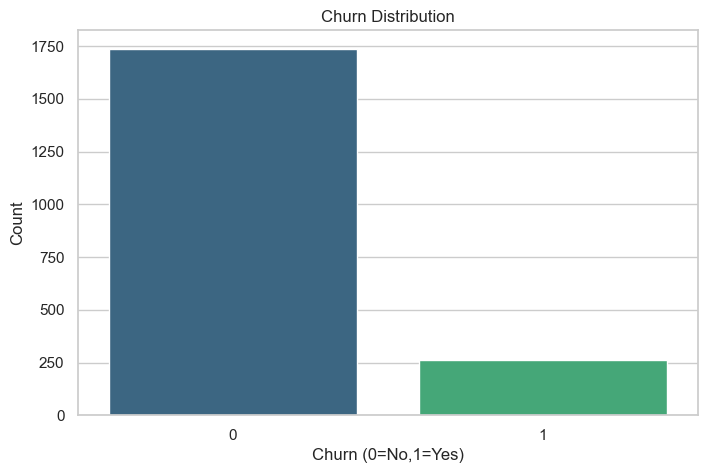

In [43]:
plt.figure()
sns.countplot(x='churn',data=df,palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No,1=Yes)')
plt.ylabel("Count")
plt.show()

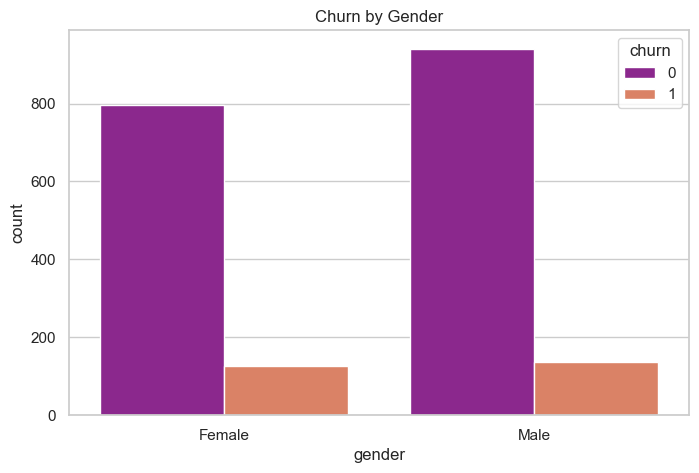

In [45]:
plt.figure()
sns.countplot(x='gender',hue='churn',data=df,palette='plasma')
plt.title('Churn by Gender')
plt.show()

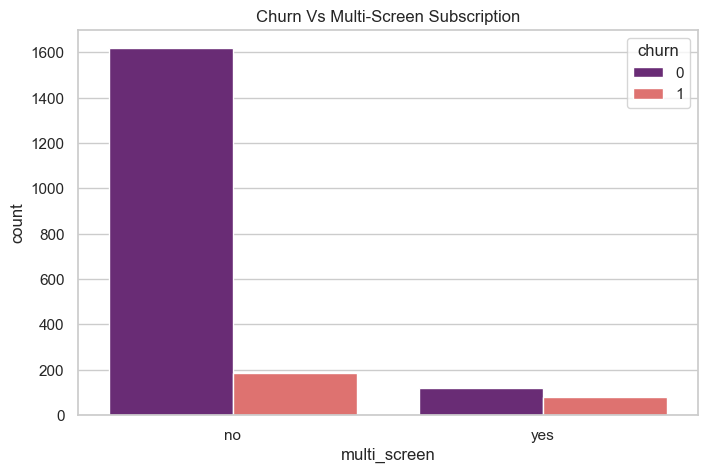

In [49]:
plt.figure()
sns.countplot(x='multi_screen',hue='churn',data=df,palette='magma')
plt.title('Churn Vs Multi-Screen Subscription')
plt.show()

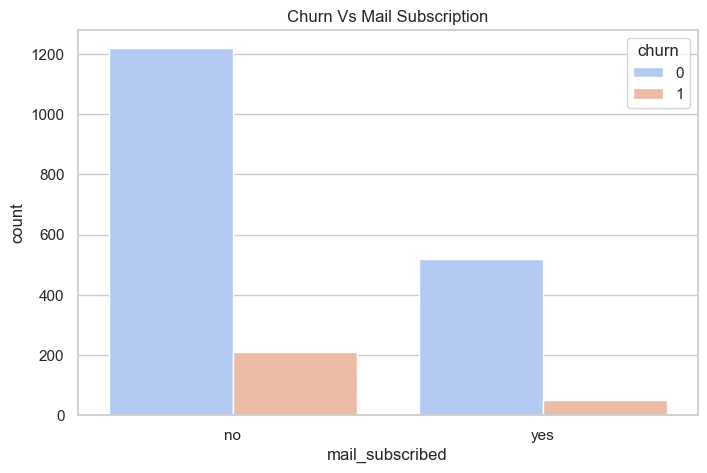

In [53]:
plt.figure()
sns.countplot(x='mail_subscribed',hue='churn',data=df,palette='coolwarm')
plt.title('Churn Vs Mail Subscription')
plt.show()

C:\Users\anasm\AppData\Local\Temp\ipykernel_10880\2115753691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn',y='customer_support_calls',data=df,palette='cividis')


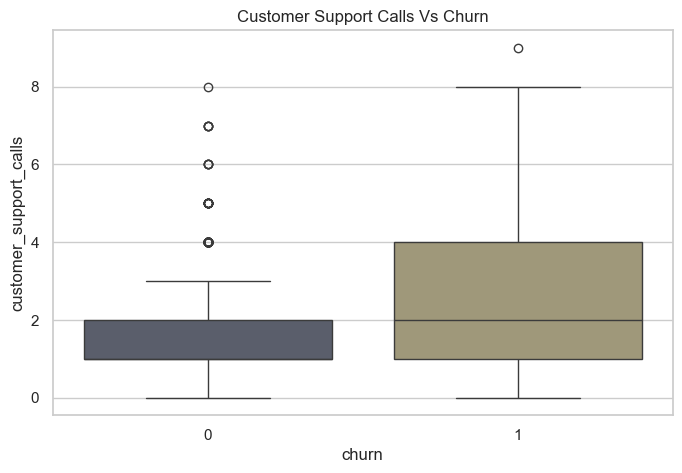

In [57]:
plt.figure()
sns.boxplot(x='churn',y='customer_support_calls',data=df,palette='cividis')
plt.title('Customer Support Calls Vs Churn')
plt.show()

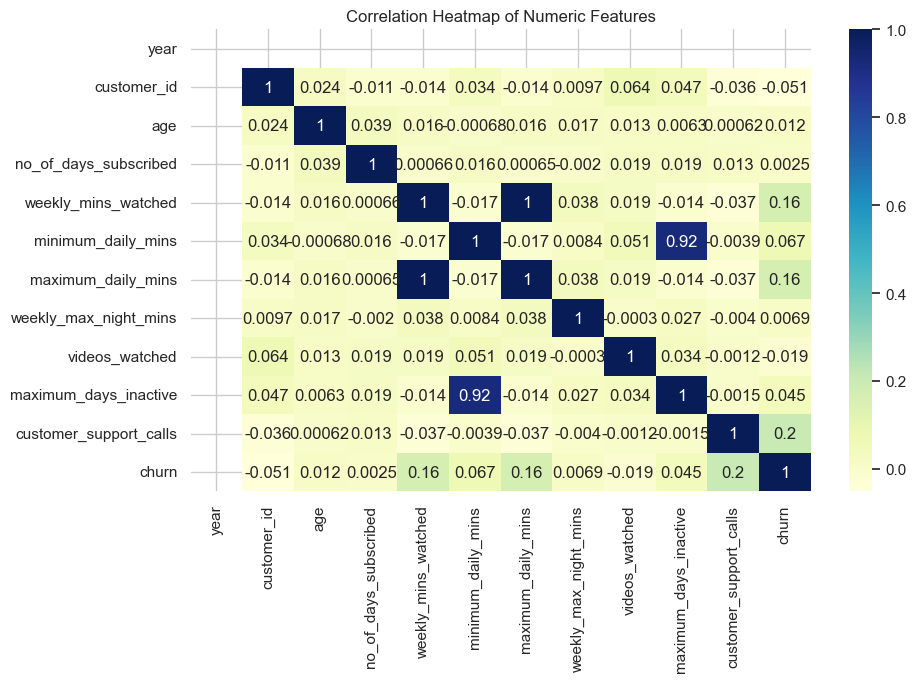

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [61]:
print("Average Feature Comparison (Churn vs Non-Churn):")
display(df.groupby('churn').mean(numeric_only=True))

Average Feature Comparison (Churn vs Non-Churn):


,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
churn,,,,,,,,,,,
0,2015.0,560099.248562,38.643843,99.711162,265.085731,10.126640,30.043613,100.363061,4.501151,3.233026,1.442463
1,2015.0,520312.293893,39.000000,100.007634,303.961260,10.676718,34.449466,100.763359,4.358779,3.339695,2.240458


In [67]:
import pyodbc
import pandas as pd


df = pd.read_csv("cleaned_telecom_churn_data.csv")

server = 'HP'           # e.g. 'DESKTOP-12345\SQLEXPRESS'
database = 'Telecom_Churn_DB'
username = 'sa'                       # or your SQL username
password = '123'

# Create connection string
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};DATABASE={database};UID={username};PWD={password}'
)

cursor = conn.cursor()
print("✅ Connected to SQL Server Successfully!")


✅ Connected to SQL Server Successfully!


In [69]:
# Create table if not exists
create_table_query = '''
CREATE TABLE Telecom_Churn (
    year INT,
    customer_id INT,
    phone_no VARCHAR(20),
    gender VARCHAR(10),
    age INT,
    no_of_days_subscribed INT,
    multi_screen VARCHAR(5),
    mail_subscribed VARCHAR(5),
    weekly_mins_watched FLOAT,
    minimum_daily_mins FLOAT,
    maximum_daily_mins FLOAT,
    weekly_max_night_mins INT,
    videos_watched INT,
    maximum_days_inactive FLOAT,
    customer_support_calls INT,
    churn INT
);
'''
cursor.execute(create_table_query)
conn.commit()
print("✅ Table 'Telecom_Churn' created (or already exists).")


✅ Table 'Telecom_Churn' created (or already exists).


In [71]:
# Insert rows into SQL table
for index, row in df.iterrows():
    cursor.execute('''
        INSERT INTO Telecom_Churn VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
    ''', tuple(row))
conn.commit()

print(f"✅ Successfully inserted {len(df)} rows into Telecom_Churn table!")


✅ Successfully inserted 2000 rows into Telecom_Churn table!
